In [2]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [3]:
googledata=pd.read_csv("Downloads/googleplaystore.csv/googleplaystore.csv")

In [4]:
googledata.shape

(10841, 13)

In [5]:
googledata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
googledata.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B188D76D0>]],
      dtype=object)

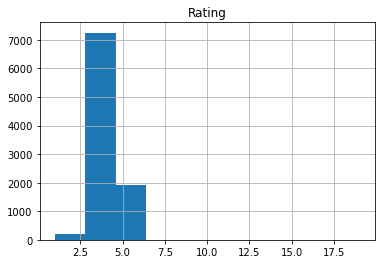

In [7]:
googledata.hist()

In [8]:
googledata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
googledata.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
googledata.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
googledata[googledata.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
googledata.drop([10472],inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B189CEF70>]],
      dtype=object)

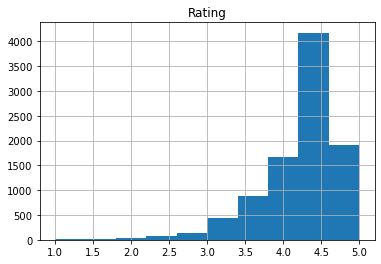

In [13]:
googledata.hist()

In [14]:
threshold=len(googledata)*0.1
threshold

1084.0

In [15]:
googledata.dropna(thresh=threshold,axis=1,inplace=True)

In [16]:
googledata.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [17]:
#Define a function impute_median
def impute_median(series):
    return series.fillna(series.median())

In [18]:
googledata.Rating = googledata['Rating'].transform(impute_median)

In [19]:
googledata.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [20]:
# modes of categorical values
print(googledata['Type'].mode())
print(googledata['Current Ver'].mode())
print(googledata['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [21]:
# Fill the missing categorical values with mode
googledata['Type'].fillna(str(googledata['Type'].mode().values[0]),inplace=True)
googledata['Current Ver'].fillna(str(googledata['Current Ver'].mode().values[0]),inplace=True)
googledata['Android Ver'].fillna(str(googledata['Android Ver'].mode().values[0]),inplace=True)

In [22]:
googledata.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [23]:
### Let's convert Price, Reviews and Ratings into Numerical Values
googledata['Price'] = googledata['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
googledata['Price'] = googledata['Price'].apply(lambda x: float(x))
googledata['Reviews'] = pd.to_numeric(googledata['Reviews'], errors='coerce')

In [24]:
googledata['Installs']=googledata['Installs'].apply(lambda x:str(x).replace('+','')if '+' in str(x) else str(x))
googledata['Installs']=googledata['Installs'].apply(lambda x:str(x).replace(',','')if ',' in str(x) else str(x))
googledata['Installs']=googledata['Installs'].apply(lambda x:float(x))

In [25]:
googledata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [26]:
googledata.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [27]:
grp = googledata.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

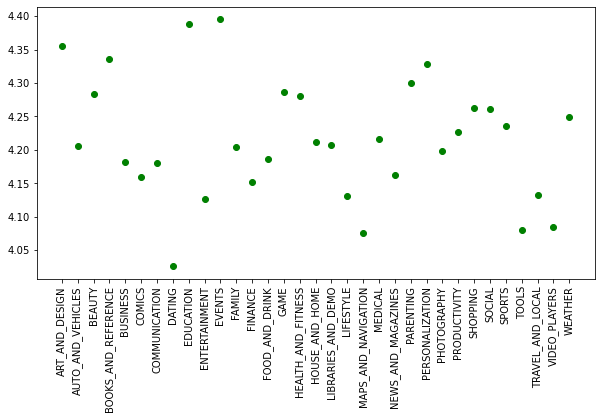

In [28]:
plt.figure(figsize=(10,5))
plt.plot(x,'ro',color='g')
plt.xticks(rotation=90)
plt.show()

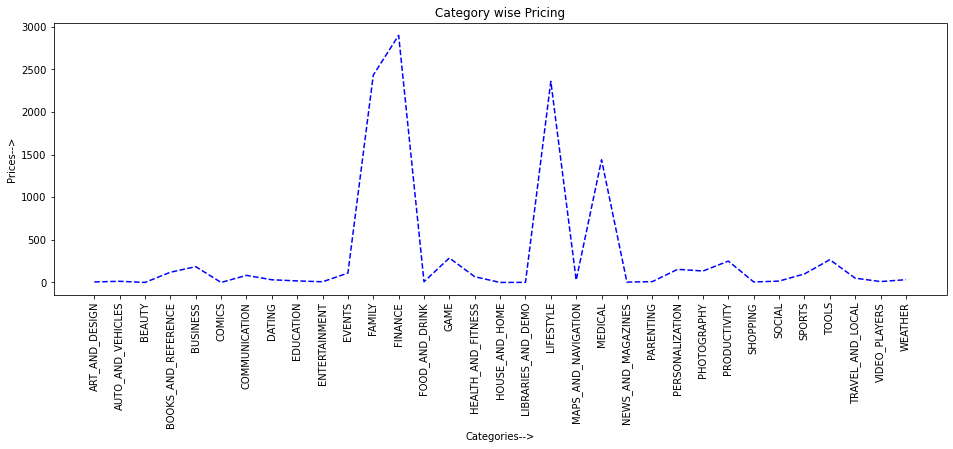

In [29]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='b')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Categories-->')
plt.ylabel('Prices-->')
plt.show()

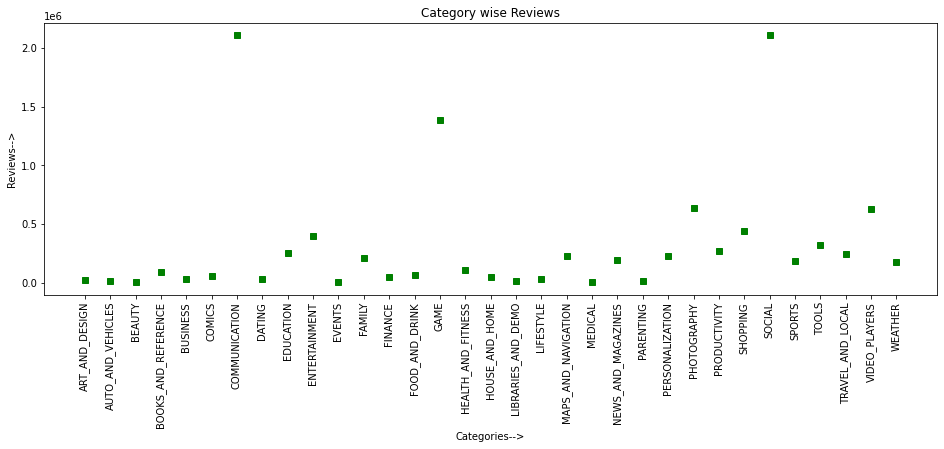

In [30]:
plt.figure(figsize=(16,5))
plt.plot(z,'bs', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()

In [31]:
googledata.dropna(axis=0,inplace=True)

In [32]:
Label_encoder=preprocessing.LabelEncoder()
googledata['Category']=Label_encoder.fit_transform(googledata['Category']
googledata['Type']=Label_encoder.fit_transform(googledata['Type'])
googledata['Content Rating']=Label_encoder.fit_transform(googledata['Content Rating'])
googledata['Genres ']=Label_encoder.fit_transform(googledata['Genres'])

SyntaxError: invalid syntax (<ipython-input-32-041d30d5e142>, line 3)

In [33]:
googledata

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Lets try for logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
maxmin = MinMaxScaler()
dummies = pd.get_dummies(googledata[googledata.columns.difference(["Rating"])])
x = maxmin.fit_transform(dummies)
y = googledata["Rating"]

print(x.shape)
print(y.shape)

(10840, 14524)
(10840,)


In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8130, 14524) (2710, 14524) (8130,) (2710,)


In [43]:
log_reg_model = LogisticRegression(max_iter=1000, solver = "newton-cg")
log_reg_model.fit(x_train, y_train)

ValueError: Unknown label type: 'continuous'

### Error as continuous

In [38]:
y_pred = log_reg_model.predict(x_test)
df_predict = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
df_predict

NameError: name 'log_reg_model' is not defined

In [44]:
import statsmodels.api as sn

In [45]:
googledata.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.063166,0.045496,-0.019318
Reviews,0.063166,1.000000,0.643122,-0.009667
Installs,0.045496,0.643122,1.000000,-0.011689
Price,-0.019318,-0.009667,-0.011689,1.000000


In [46]:
a=sn.add_constant(googledata['Category'])

In [58]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Category   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.392e+30
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:15:15   Log-Likelihood:             2.9479e+05
No. Observations:               10840   AIC:                        -5.896e+05
Df Residuals:                   10838   BIC:                        -5.896e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.263e-14   8.05e-15     -4.053      0.000   -4.84e-14   -1.68e-14
Category       1.0000   4.31e-16   2.32e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     5028.686   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.736
Skew:                          -0.124   Prob(JB):                    1.95e-129
Kurtosis:                       1.882   Cond. No.                         41.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## lets go throuugh the linear regression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
googledata.dropna(axis=0,inplace=True)

In [51]:
Label_encoder=preprocessing.LabelEncoder()
googledata['App']=Label_encoder.fit_transform(googledata['App'])
googledata['Category']=Label_encoder.fit_transform(googledata['Category'])
googledata['Reviews']=Label_encoder.fit_transform(googledata['Reviews'])
googledata['Size']=Label_encoder.fit_transform(googledata['Size'])
googledata['Installs']=Label_encoder.fit_transform(googledata['Installs'])
googledata['Type']=Label_encoder.fit_transform(googledata['Type'])
googledata['Price']=Label_encoder.fit_transform(googledata['Price'])
googledata['Content Rating']=Label_encoder.fit_transform(googledata['Content Rating'])
googledata['Genres']=Label_encoder.fit_transform(googledata['Genres'])
googledata['Current Ver']=Label_encoder.fit_transform(googledata['Current Ver'])
googledata['Android Ver']=Label_encoder.fit_transform(googledata['Android Ver'])
googledata['Last Updated']=Label_encoder.fit_transform(googledata['Last Updated'])

In [52]:
y = googledata['Category']
x = googledata[['App']]

In [53]:
lm2 =LinearRegression()

In [54]:
lm2.fit(x,y)

LinearRegression()

In [55]:
print(lm2.intercept_,lm2.coef_)

16.43893384859182 [5.84481862e-05]


In [56]:
lm2.predict(x)

array([16.84585012, 16.59276947, 16.94486135, ..., 16.8417003 ,
       16.92954792, 16.99337334])

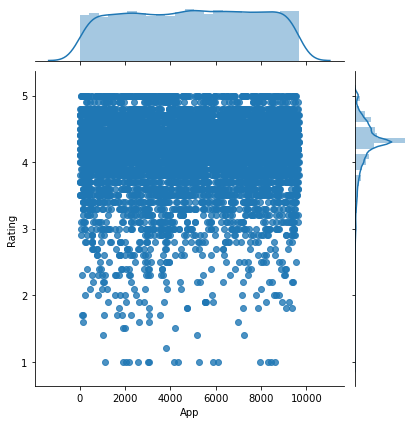

In [57]:
sns.jointplot(x=googledata["App"], y = googledata["Rating"], data =googledata, kind = 'reg')

In [58]:
x_multi = googledata.drop("Category",axis = 1)
y_multi = googledata["Category"]

In [59]:
x_multi_cons = sn.add_constant(x_multi)

In [60]:
x_multi_cons.head()

,const,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,1.0,6962,4.1,159,53,9,0,0,1,9,560,118,15
1,1.0,2632,3.9,725,27,12,0,0,1,12,480,1018,15
2,1.0,8656,4.7,3948,366,14,0,0,1,9,115,464,15
3,1.0,7827,4.5,4564,99,16,0,0,4,9,823,2764,18
4,1.0,7022,4.3,725,62,11,0,0,1,11,755,277,20


In [61]:
Label_encoder=preprocessing.LabelEncoder()
googledata['Last Updated']=Label_encoder.fit_transform(googledata['Last Updated'])

In [62]:
lm_multi = sn.OLS(y_multi, x_multi_cons).fit()

In [65]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Category   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     1524.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:26:40   Log-Likelihood:                -33029.
No. Observations:               10840   AIC:                         6.608e+04
Df Residuals:                   10827   BIC:                         6.618e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.6210      0.582      6.225      0.000       2.481       4.761
App            -1.368e-05    1.8e-05     -0.759      0.448    -4.9e-05    2.16e-05
Rating            -0.1230      0.108     -1.141      0.254      -0.334       0.088
Reviews            0.0002   5.67e-05      3.225      0.001    7.17e-05       0.000
Size              -0.0013      0.000     -3.345      0.001      -0.002      -0.001
Installs           0.0102      0.028      0.368      0.713      -0.044       0.064
Type               1.7808      0.306      5.818      0.000       1.181       2.381
Price             -0.0294      0.008     -3.676      0.000      -0.045      -0.014
Content Rating     0.0227      0.050      0.455      0.649      -0.075       0.121
Genres             0.2017      0.002    131.946      0.000       0.199       0.205
Last Updated       0.0002      0.000      1.121      0.262      -0.000       0.000
Current Ver     5.553e-05   6.51e-05      0.853      0.394   -7.21e-05       0.000
Android Ver        0.0148      0.009      1.737      0.082      -0.002       0.032
==============================================================================
Omnibus:                      343.537   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.162
Skew:                          -0.452   Prob(JB):                     2.08e-82
Kurtosis:                       3.125   Cond. No.                     7.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
lm3 = LinearRegression()

In [64]:
lm3.fit(x_multi,y_multi)

LinearRegression()

In [66]:
print(lm3.intercept_,lm3.coef_) #(beta0, beta1... beta n)

3.6209961873707055 [-1.36785566e-05 -1.22994709e-01  1.82900361e-04 -1.25711059e-03
  1.01929687e-02  1.78081021e+00 -2.94394741e-02  2.27450985e-02
  2.01700382e-01  1.65297773e-04  5.55331296e-05  1.48192827e-02]


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x_multi,y_multi, test_size = 0.2, random_state = 0)

In [69]:
print(x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape)

(8672, 12) (2168, 12) (8672,) (2168,)


In [70]:
lm_a =LinearRegression()

In [71]:
lm_a.fit(x_train,y_train)

LinearRegression()

In [72]:
y_test_a = lm_a.predict(x_test)

In [73]:
y_train_a = lm_a.predict(x_train)

In [74]:
from sklearn.metrics import r2_score #r2_score? will help to know with documentation

In [75]:
r2_score(y_test,y_test_a)

0.631182807036919

In [76]:
r2_score(y_train,y_train_a)

0.6271767823872627

In [77]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [78]:
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [80]:
from sklearn.linear_model import Ridge

In [81]:
lm_r = Ridge(alpha = 0.5)
lm_r.fit(x_train_s,y_train)

Ridge(alpha=0.5)

In [82]:
r2_score(y_test, lm_r.predict(x_test_s))

0.6311832040366243

In [83]:
param_range = np.logspace(-2,8,100) #100 values from 10^-2 to 10^8 

In [85]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [87]:
from sklearn.model_selection import validation_curve

In [88]:
train_scores, test_scores = validation_curve (Ridge(),x_train,y_train,"alpha",param_range, scoring= 'r2')

C:\Users\amraa\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-02 1.26185688e-02 1.59228279e-02 2.00923300e-02
 2.53536449e-02 3.19926714e-02 4.03701726e-02 5.09413801e-02
 6.42807312e-02 8.11130831e-02 1.02353102e-01 1.29154967e-01
 1.62975083e-01 2.05651231e-01 2.59502421e-01 3.27454916e-01
 4.13201240e-01 5.21400829e-01 6.57933225e-01 8.30217568e-01
 1.04761575e+00 1.32194115e+00 1.66810054e+00 2.10490414e+00
 2.65608778e+00 3.35160265e+00 4.22924287e+00 5.33669923e+00
 6.73415066e+00 8.49753436e+00 1.07226722e+01 1.35304777e+01
 1.70735265e+01 2.15443469e+01 2.71858824e+01 3.43046929e+01
 4.32876128e+01 5.46227722e+01 6.89261210e+01 8.69749003e+01
 1.09749877e+02 1.38488637e+02 1.74752840e+02 2.20513074e+02
 2.78255940e+02 3.51119173e+02 4.43062146e+02 5.59081018e+02
 7.05480231e+02 8.90215085e+02 1.12332403e+03 1.41747416e+03
 1.78864953e+03 2.25701972e+03 2.84803587e+03 3.59381366e+03
 4.53487851e+03 5.722

In [89]:
print(train_scores)
print(test_scores)

[[0.63368808 0.62918626 0.63376082 0.61875502 0.62138219]
 [0.63368808 0.62918626 0.63376082 0.61875502 0.62138219]
 [0.63368808 0.62918626 0.63376082 0.61875502 0.62138219]
 [0.63368808 0.62918626 0.63376082 0.61875502 0.62138219]
 [0.63368808 0.62918626 0.63376082 0.61875502 0.62138219]
 [0.63368808 0.62918626 0.63376082 0.61875502 0.62138219]
 [0.63368808 0.62918626 0.63376082 0.61875502 0.62138219]
 [0.63368808 0.62918626 0.63376082 0.61875502 0.62138219]
 [0.63368808 0.62918626 0.63376082 0.61875502 0.62138219]
 [0.63368808 0.62918626 0.63376082 0.61875502 0.62138219]
 [0.63368808 0.62918626 0.63376082 0.61875502 0.62138219]
 [0.63368808 0.62918626 0.63376082 0.61875502 0.62138219]
 [0.63368808 0.62918626 0.63376082 0.61875502 0.62138219]
 [0.63368808 0.62918626 0.63376082 0.61875502 0.62138219]
 [0.63368808 0.62918626 0.63376082 0.61875502 0.62138219]
 [0.63368807 0.62918626 0.63376081 0.61875502 0.62138219]
 [0.63368807 0.62918626 0.63376081 0.61875501 0.62138218]
 [0.63368807 0

In [90]:
train_mean = np.mean(train_scores, axis =1)
train_mean

array([0.62735448, 0.62735448, 0.62735448, 0.62735448, 0.62735448,
       0.62735448, 0.62735448, 0.62735448, 0.62735447, 0.62735447,
       0.62735447, 0.62735447, 0.62735447, 0.62735447, 0.62735447,
       0.62735447, 0.62735447, 0.62735446, 0.62735446, 0.62735444,
       0.62735443, 0.6273544 , 0.62735435, 0.62735428, 0.62735417,
       0.62735399, 0.6273537 , 0.62735326, 0.62735258, 0.62735151,
       0.62734986, 0.62734735, 0.62734355, 0.62733786, 0.62732947,
       0.62731733, 0.62730011, 0.62727626, 0.62724412, 0.62720217,
       0.62714924, 0.62708491, 0.62700969, 0.62692522, 0.62683405,
       0.62673942, 0.62664473, 0.62655312, 0.62646715, 0.62638857,
       0.62631837, 0.6262568 , 0.62620363, 0.62615825, 0.62611984,
       0.62608752, 0.6260604 , 0.62603763, 0.62601847, 0.62600224,
       0.62598833, 0.62597619, 0.62596525, 0.6259549 , 0.62594437,
       0.62593261, 0.62591815, 0.62589876, 0.62587111, 0.62583005,
       0.6257677 , 0.62567187, 0.62552382, 0.62529479, 0.62494

In [91]:
#Lets see the improvemnt in r2 score
test_mean = np.mean(test_scores, axis =1)
max(test_mean)

0.6243995835414926

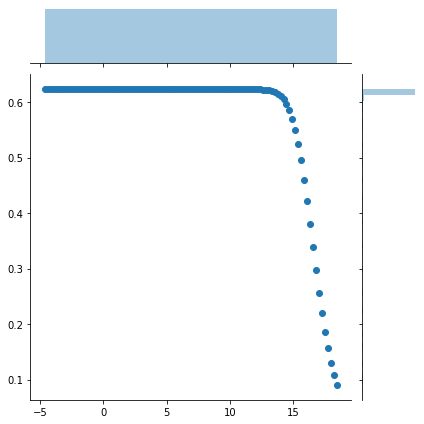

In [92]:
sns.jointplot(x=np.log(param_range), y = test_mean)